In [371]:
from importlib import reload
import datetime

import to_lexicon as lex
reload(lex)

import base_words
reload(base_words)
from base_words import *

In [419]:
path = "./NYT-OPINION2016-2017-processed"

start = datetime.datetime(2016, 6, 1)
end = datetime.datetime(2017, 7, 1)

articles = lex.get_articles_from_filepath(path, start, end)

print ("finished grabbing articles")

left_collocations = lex.get_collocations(articles, LEFT_WORDS, RIGHT_WORDS)
right_collocations = lex.get_collocations(articles, RIGHT_WORDS, LEFT_WORDS)

finished grabbing articles


In [422]:
import pickle

with open('left_collocations.pkl', 'wb') as fp:
    pickle.dump(left_collocations, fp)
with open('right_collocations.pkl', 'wb') as fp:
    pickle.dump(right_collocations, fp)
    
# with open ('outfile', 'rb') as fp:
#     itemlist = pickle.load(fp)

In [424]:
with open ('left_collocations.pkl', 'rb') as fp:
    lefte_collocations = pickle.load(fp)
with open ('right_collocations.pkl', 'rb') as fp:
    righte_collocations = pickle.load(fp)

In [425]:
# print (left_collocations[:500])
print (len(left_collocations))
print (len(right_collocations))

209324
589719
209324
589719


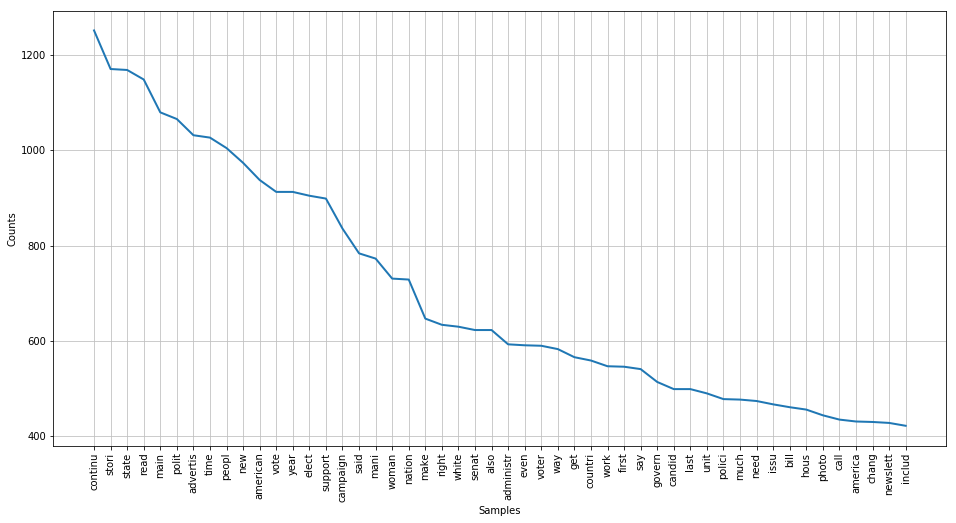

In [426]:
import matplotlib.pyplot as plt 
import nltk

def word_distributions(words):
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(16,8))
    freqdist.plot(50)
    plt.show()
    
word_distributions(left_collocations)
### evaluating collocates

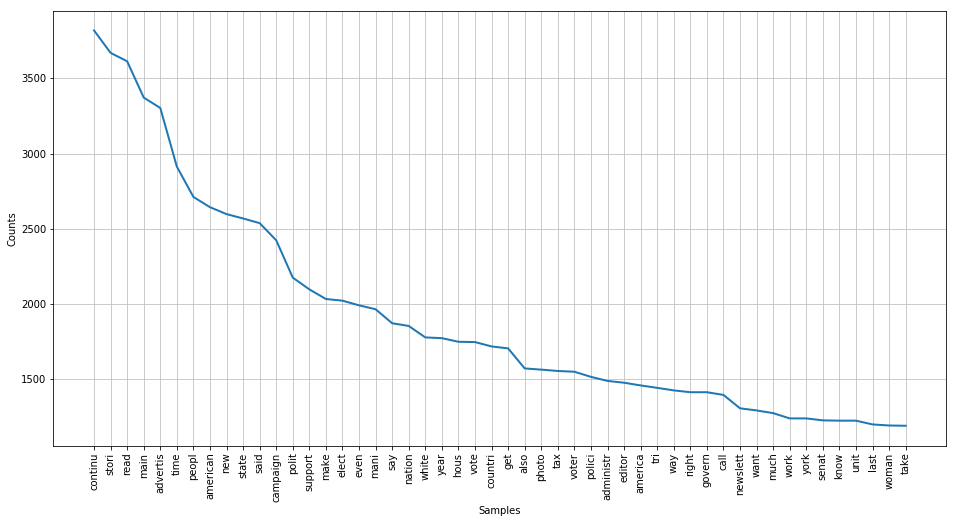

In [427]:
word_distributions(right_collocations)

In [428]:
from collections import Counter
from nltk import ngrams

ngram_counts = Counter(ngrams(left_collocations, 1))
ngram_counts.most_common(50)

[(('continu',), 1252),
 (('stori',), 1171),
 (('state',), 1169),
 (('read',), 1149),
 (('main',), 1080),
 (('polit',), 1066),
 (('advertis',), 1032),
 (('time',), 1027),
 (('peopl',), 1005),
 (('new',), 974),
 (('american',), 938),
 (('vote',), 913),
 (('year',), 913),
 (('elect',), 905),
 (('support',), 899),
 (('campaign',), 836),
 (('said',), 784),
 (('mani',), 773),
 (('woman',), 731),
 (('nation',), 729),
 (('make',), 647),
 (('right',), 634),
 (('white',), 630),
 (('senat',), 623),
 (('also',), 623),
 (('administr',), 593),
 (('even',), 591),
 (('voter',), 590),
 (('way',), 583),
 (('get',), 566),
 (('countri',), 559),
 (('work',), 547),
 (('first',), 546),
 (('say',), 541),
 (('govern',), 514),
 (('candid',), 499),
 (('last',), 499),
 (('unit',), 490),
 (('polici',), 478),
 (('much',), 477),
 (('need',), 474),
 (('issu',), 467),
 (('bill',), 461),
 (('hous',), 456),
 (('photo',), 444),
 (('call',), 435),
 (('america',), 431),
 (('chang',), 430),
 (('newslett',), 428),
 (('includ

In [429]:
from collections import Counter
from nltk import ngrams

ngram_counts = Counter(ngrams(right_collocations, 1))
l = ngram_counts.most_common()
print (len(l))
ngram_counts.most_common(50)

16627


[(('continu',), 3818),
 (('stori',), 3669),
 (('read',), 3613),
 (('main',), 3372),
 (('advertis',), 3303),
 (('time',), 2913),
 (('peopl',), 2712),
 (('american',), 2644),
 (('new',), 2598),
 (('state',), 2569),
 (('said',), 2538),
 (('campaign',), 2424),
 (('polit',), 2176),
 (('support',), 2098),
 (('make',), 2034),
 (('elect',), 2023),
 (('even',), 1992),
 (('mani',), 1966),
 (('say',), 1873),
 (('nation',), 1855),
 (('white',), 1779),
 (('year',), 1774),
 (('hous',), 1750),
 (('vote',), 1748),
 (('countri',), 1719),
 (('get',), 1706),
 (('also',), 1573),
 (('photo',), 1565),
 (('tax',), 1556),
 (('voter',), 1551),
 (('polici',), 1517),
 (('administr',), 1490),
 (('editor',), 1478),
 (('america',), 1460),
 (('tri',), 1444),
 (('way',), 1427),
 (('right',), 1415),
 (('govern',), 1415),
 (('call',), 1397),
 (('newslett',), 1308),
 (('want',), 1294),
 (('much',), 1276),
 (('work',), 1241),
 (('york',), 1241),
 (('senat',), 1228),
 (('know',), 1226),
 (('unit',), 1226),
 (('last',), 12

799043


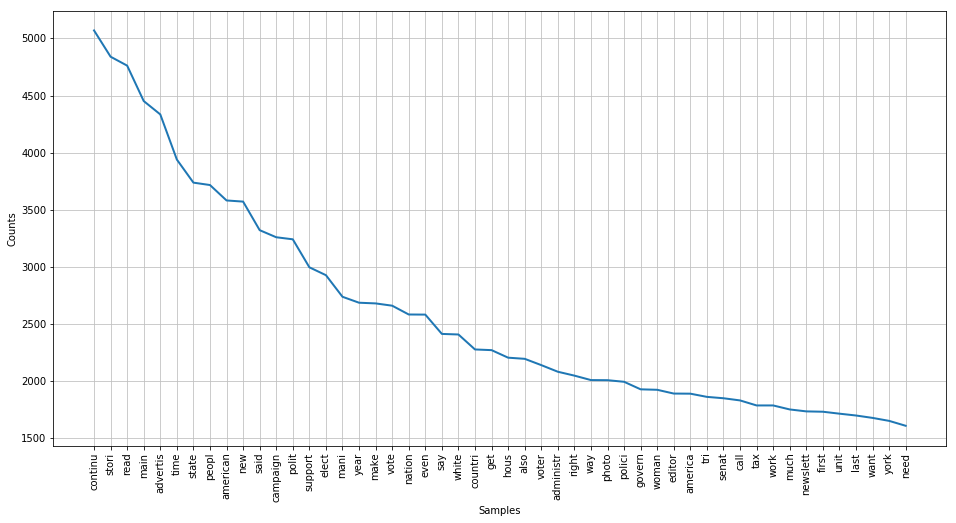

In [430]:
# rate by semantic positivity, and then see proportion of dem/rep associated with each one?

all_words = left_collocations + right_collocations
print (len(all_words))

ngram_counts = Counter(ngrams(all_words, 1))
all_wc = [tup[0][0] for tup in ngram_counts.most_common()]

word_distributions(all_words)

In [382]:
from collections import defaultdict

left_usage = defaultdict(lambda: 0)
for word in left_collocations:
    left_usage[word] += 1
      
right_usage = defaultdict(lambda: 0)
for word in right_collocations:
    right_usage[word] += 1

In [431]:
words = all_wc[:50]

y_left = []
y_right = []

for word in words:
    y_left.append(left_usage[word])
    y_right.append(right_usage[word])

50
50


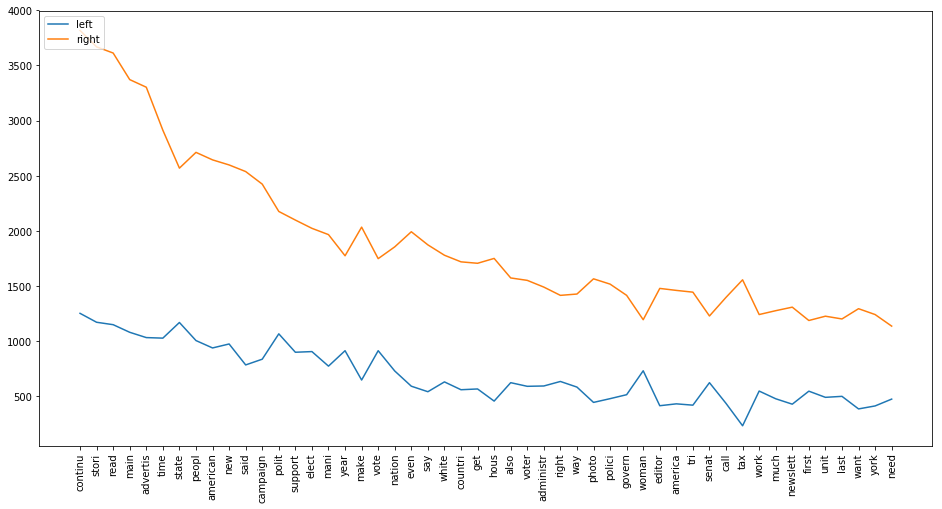

In [432]:
print (len(words))
print (len(y_right))

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)

plt.plot(words, y_left)
plt.plot(words, y_right)

plt.legend(['left', 'right'], loc='upper left')
plt.show()

# use different graph for this


5622 9423
0.12879367473644937
0.13163766637762808
right_collocations is more unique, by 0.0028439916411787114


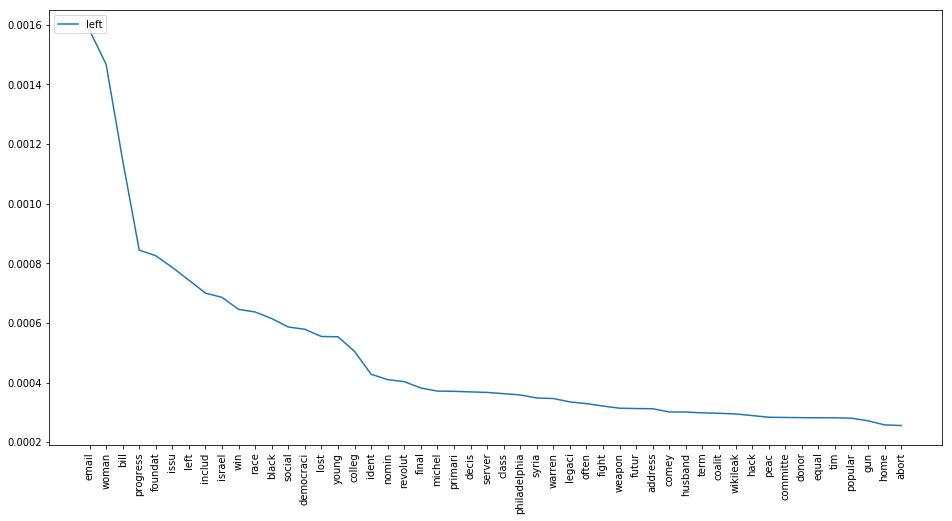

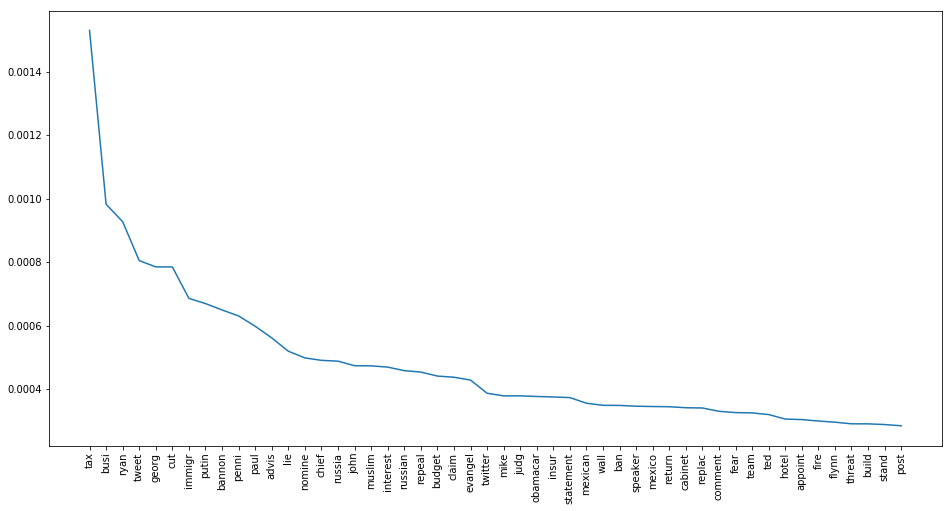

email woman bill progress foundat issu left includ israel win race black social democraci lost young colleg ident nomin revolut final michel primari decis server class philadelphia syria warren legaci often fight weapon futur address comey husband term coalit wikileak hack peac committe donor equal tim popular gun home abort
tax busi ryan tweet georg cut immigr putin bannon penni paul advis lie nomine chief russia john muslim interest russian repeal budget claim evangel twitter mike judg obamacar insur statement mexican wall ban speaker mexico return cabinet replac comment fear team ted hotel appoint fire flynn threat build stand post


In [438]:
#### showing overlap ###
from collections import defaultdict


def get_counts(group):
    total = 0
    counts = defaultdict(lambda: 0)
    for word in group:
        counts[word] += 1
        total+=1
    ratios = defaultdict(lambda: 0)
    for word,count in counts.items():
        ratios[word] = float(count)/total
    return counts, ratios
        

def overlap(group1, group2):    
    group1_counts, group1_ratios = get_counts(group1)
    group2_counts, group2_ratios = get_counts(group2)
    
    THRESHOLD = .5
        
    overlap = []
    
    set1 = defaultdict(lambda: 0)
    for word, ratio in group1_ratios.items():
        if ratio > (group2_ratios[word] + (group2_ratios[word] * THRESHOLD)):
            set1[word] = ratio-group2_ratios[word]
        
    set2 = defaultdict(lambda: 0)
    for word, ratio in group2_ratios.items():
        if ratio > (group1_ratios[word] + (group1_ratios[word] * THRESHOLD)):
            set2[word] = ratio-group1_ratios[word]
    
    print (len(set1), len(set2))
    return set1, set2


sample1 = left_collocations
sample2 = right_collocations

# print (len(sample1),len(sample2))

# sample1 = ["new","new","new","new","this","diff","how"]
# sample2 = ["new","new","new","new","new","a","c"]

left_set, right_set = overlap(sample1, sample2)
    
# num_overlaps = sum(overlaps.values())
num_left_unique = sum(left_set.values())
num_right_unique = sum(right_set.values())

print (num_left_unique)
print (num_right_unique)

if num_left_unique > num_right_unique:
    print ("{} is more unique, by {}".format("left_collocations",num_left_unique - num_right_unique))
else:
    print ("{} is more unique, by {}".format("right_collocations",num_right_unique - num_left_unique))

sorted_left_unique = sorted([(k,v) for k,v in left_set.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_right_unique = sorted([(k,v) for k,v in right_set.items() if v>0],key=lambda x:x[1],reverse=True)

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)

plt.plot([tup[0] for tup in sorted_left_unique[:50]], [tup[1] for tup in sorted_left_unique[:50]])
# plt.plot(sorted_left_unique.keys()[:50], sorted_left_unique.values()[:50])

plt.legend(['left', 'right'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.plot([tup[0] for tup in sorted_right_unique[:50]], [tup[1] for tup in sorted_right_unique[:50]])
plt.show()

top_left = [tup[0] for tup in sorted_left_unique[:50]]
print ((" ").join(top_left))
top_right = [tup[0] for tup in sorted_right_unique[:50]]
print ((" ").join(top_right))

In [389]:
m_collocations = lex.get_collocations(articles, MALE_WORDS, FEMALE_WORDS)
f_collocations = lex.get_collocations(articles, FEMALE_WORDS, MALE_WORDS)

In [408]:
import pickle

with open('m_collocations.pkl', 'wb') as fp:
    pickle.dump(m_collocations, fp)
with open('f_collocations.pkl', 'wb') as fp:
    pickle.dump(f_collocations, fp)
    

In [409]:
import pickle

with open('m_collocations.pkl', 'rb') as fp:
    m_collocations=pickle.load(fp)
with open('f_collocations.pkl', 'rb') as fp:
    f_collocations=pickle.load(fp)
    

In [410]:
# print (left_collocations[:500])
print (len(m_collocations))
print (len(f_collocations))

209324
209324


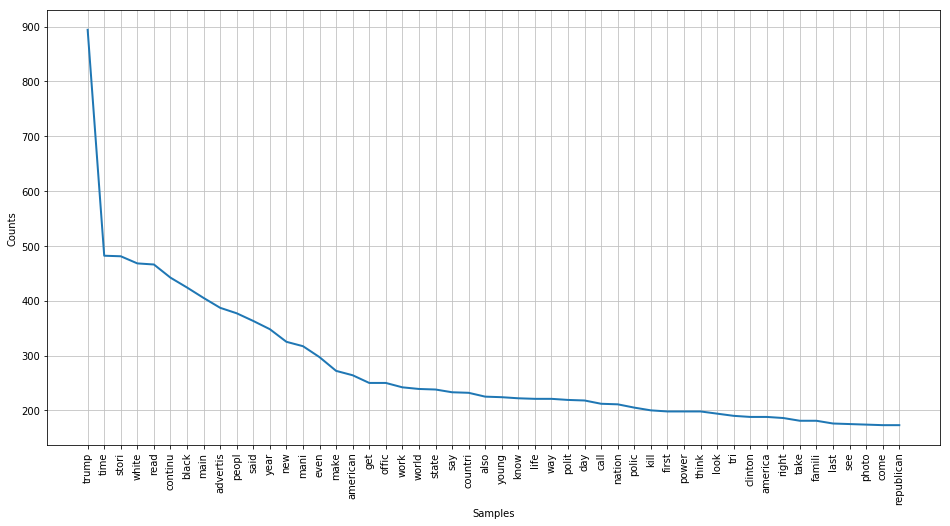

In [397]:
import matplotlib.pyplot as plt 
import nltk

def word_distributions(words):
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(16,8))
    freqdist.plot(50)
    plt.show()
    
word_distributions(m_collocations)
### evaluating collocates

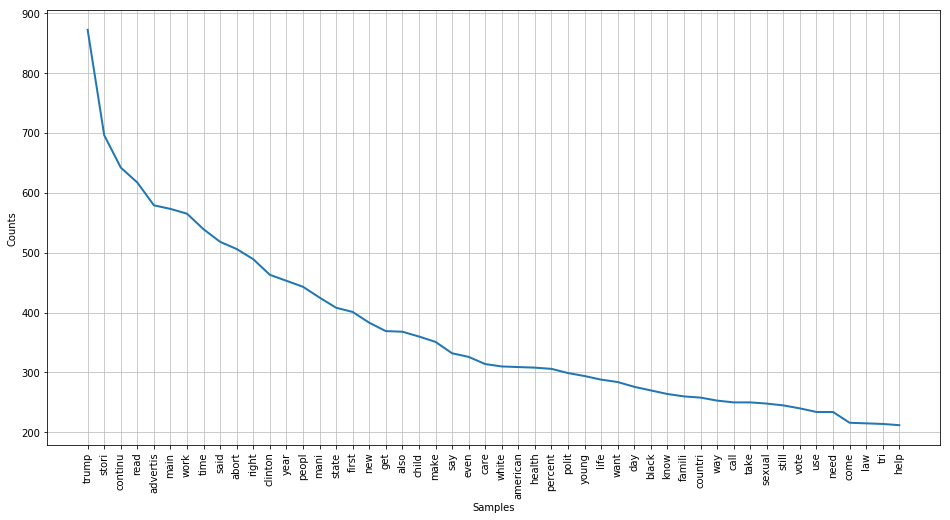

In [398]:
word_distributions(f_collocations)

0.0011083296707496513 0
0.0011083296707496513 0
1 1
0
0
f_collocations is more unique, by 0


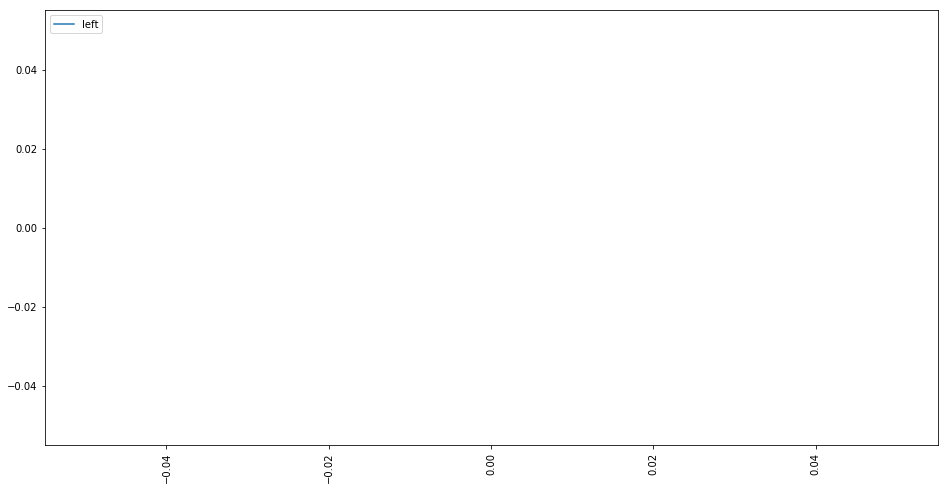

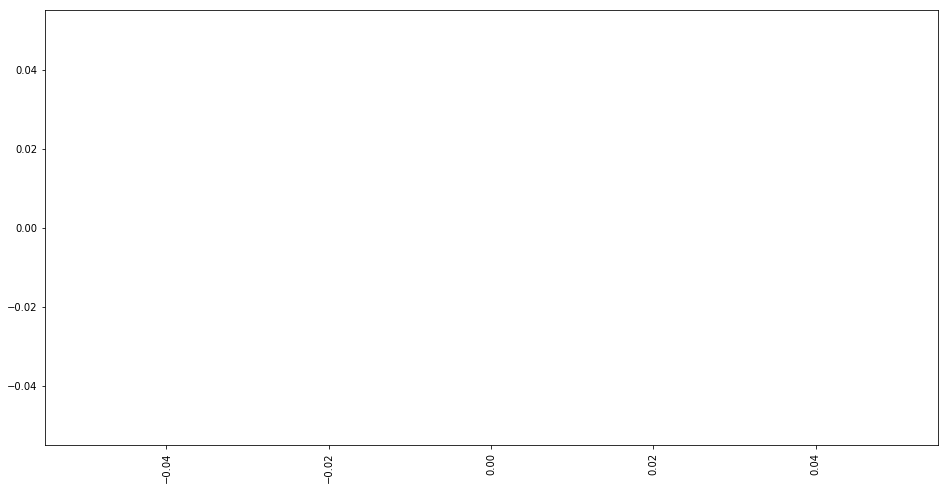

In [407]:
#### showing overlap ###
sample1 = m_collocations
sample2 = f_collocations



m_unique, f_unique = overlap(sample1, sample2)
    
num_m_unique = sum(m_unique.values())
num_f_unique = sum(f_unique.values())


print (num_m_unique)
print (num_f_unique)

if num_m_unique > num_f_unique:
    print ("{} is more unique, by {}".format("m_collocations",num_m_unique - num_f_unique))
else:
    print ("{} is more unique, by {}".format("f_collocations",num_f_unique - num_m_unique))

# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample1), num_overlaps, len(sample1), "male_collocations"))
# print ("")
# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample2), num_overlaps, len(sample2), "female_collocations"))

sorted_m_unique = sorted([(k,v) for k,v in m_unique.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_f_unique = sorted([(k,v) for k,v in f_unique.items() if v>0],key=lambda x:x[1],reverse=True)

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)

plt.plot([tup[0] for tup in sorted_m_unique[:50]], [tup[1] for tup in sorted_m_unique[:50]])
# plt.plot(sorted_left_unique.keys()[:50], sorted_left_unique.values()[:50])

plt.legend(['left', 'right'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.plot([tup[0] for tup in sorted_f_unique[:50]], [tup[1] for tup in sorted_f_unique[:50]])
plt.show()

top_m = [tup[0] for tup in sorted_m_unique[:50]]
print ((" ").join(top_m))
top_f = [tup[0] for tup in sorted_f_unique[:50]]
print ((" ").join(top_f))

In [399]:
w_collocations = lex.get_collocations(articles, WHITE_WORDS, MINORITY_WORDS, exclude=WHITE_WORDS_EXCLUDE)
b_collocations = lex.get_collocations(articles, MINORITY_WORDS, WHITE_WORDS)

In [411]:
import pickle

with open('w_collocations.pkl', 'wb') as fp:
    pickle.dump(w_collocations, fp)
with open('b_collocations.pkl', 'wb') as fp:
    pickle.dump(b_collocations, fp)

In [434]:
# print (left_collocations[:500])
print (len(w_collocations))
print (len(b_collocations))

44670
107394


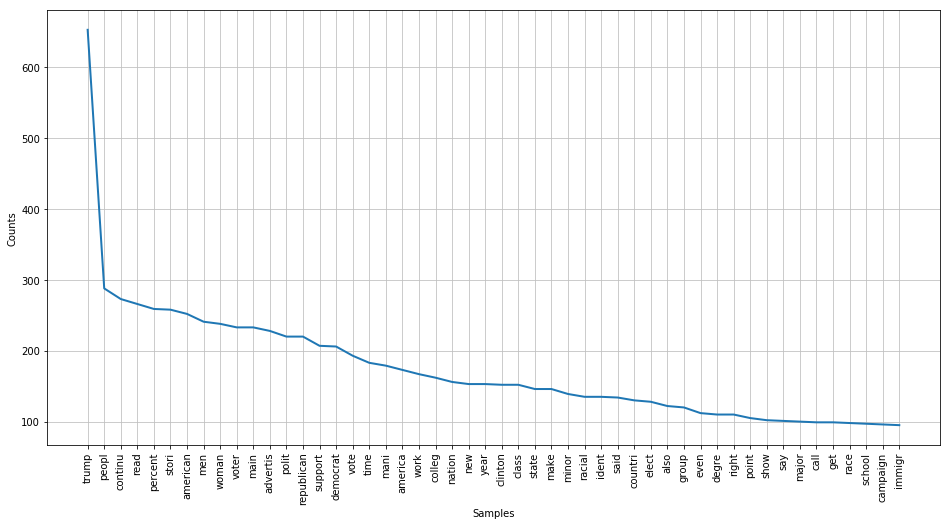

In [435]:
import matplotlib.pyplot as plt 
import nltk

def word_distributions(words):
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(16,8))
    freqdist.plot(50)
    plt.show()
    
word_distributions(w_collocations)
### evaluating collocates

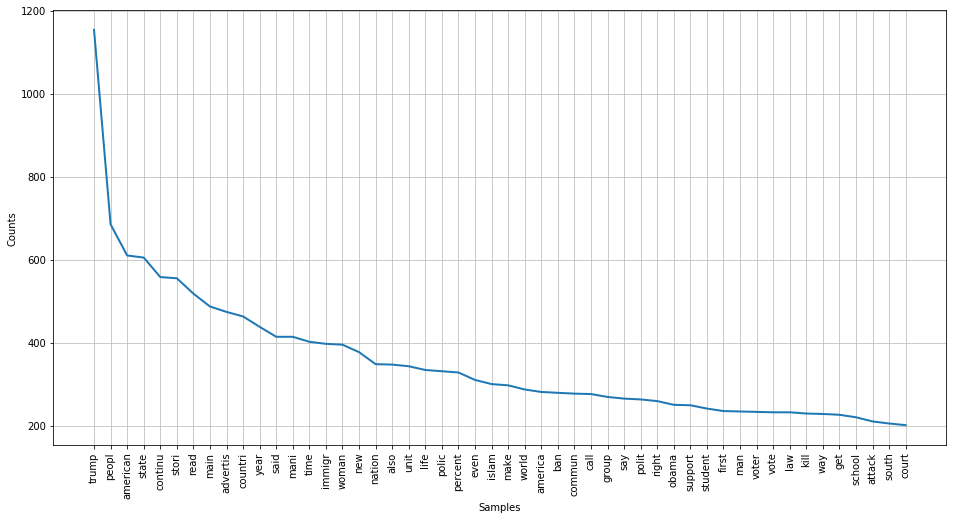

In [436]:
word_distributions(b_collocations)

3620 5991
0.2671601340221689
0.2719336203228547
b_collocations is more unique, by 0.0047734863006857475


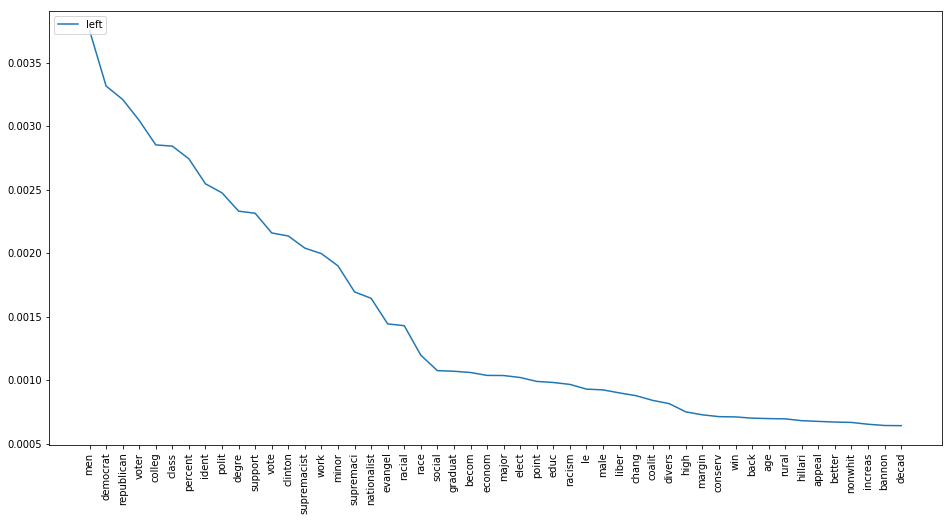

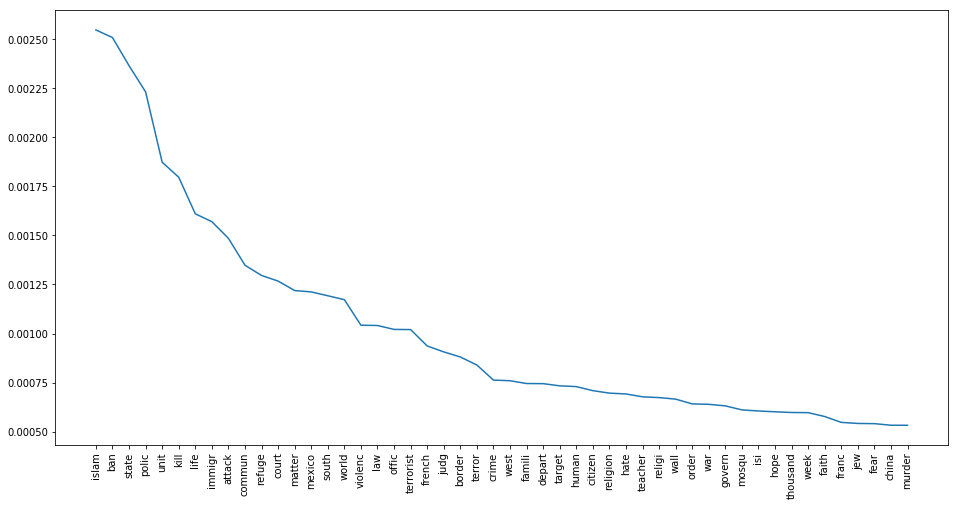

men democrat republican voter colleg class percent ident polit degre support vote clinton supremacist work minor supremaci nationalist evangel racial race social graduat becom econom major elect point educ racism le male liber chang coalit divers high margin conserv win back age rural hillari appeal better nonwhit increas bannon decad

islam ban state polic unit kill life immigr attack commun refuge court matter mexico south world violenc law offic terrorist french judg border terror crime west famili depart target human citizen religion hate teacher religi wall order war govern mosqu isi hope thousand week faith franc jew fear china murder


In [442]:
#### showing overlap ###
sample1 = w_collocations
sample2 = b_collocations

w_unique, b_unique = overlap(sample1, sample2)
    
num_w_unique = sum(w_unique.values())
num_b_unique = sum(b_unique.values())

print (num_w_unique)
print (num_b_unique)

if num_w_unique > num_b_unique:
    print ("{} is more unique, by {}".format("w_collocations",num_w_unique - num_b_unique))
else:
    print ("{} is more unique, by {}".format("b_collocations",num_b_unique - num_w_unique))
    
# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample1), num_overlaps, len(sample1), "white_collocations"))
# print ("")
# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample2), num_overlaps, len(sample2), "black_collocations"))

sorted_w_unique = sorted([(k,v) for k,v in w_unique.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_b_unique = sorted([(k,v) for k,v in b_unique.items() if v>0],key=lambda x:x[1],reverse=True)


plt.figure(figsize=(16,8))
plt.xticks(rotation=90)


plt.plot([tup[0] for tup in sorted_w_unique[:50]], [tup[1] for tup in sorted_w_unique[:50]])
# plt.plot(sorted_left_unique.keys()[:50], sorted_left_unique.values()[:50])

plt.legend(['left', 'right'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.plot([tup[0] for tup in sorted_b_unique[:50]], [tup[1] for tup in sorted_b_unique[:50]])
plt.show()

top_w = [tup[0] for tup in sorted_w_unique[:50]]
print ((" ").join(top_w))
print ("")
top_b = [tup[0] for tup in sorted_b_unique[:50]]
print ((" ").join(top_b))

In [443]:
from nltk import tokenize
import gensim

# docs = []
# for article in articles:
#     title, date_publish, text = article.title, article.date_publish, article.text
#     words = lex.text_cleanup(text,filter_support=True)
#     docs.append(words)

# word2vec trained on *all* documents -- to see larger context. 
docs = []
for article in articles:
    title, date_publish, text = article.title, article.date_publish, article.text
    sentences = tokenize.sent_tokenize(text)
    sentences = [gensim.utils.simple_preprocess(s) for s in sentences] 
    docs += sentences

In [445]:
model = gensim.models.Word2Vec(
    docs,
    size=150,
    window=10,
    min_count=1,
    workers=10)

model.train(docs, total_examples=len(docs), epochs=10)

(33111201, 41288360)

In [446]:
with open('w2vmodel.pkl', 'wb') as fp:
    pickle.dump(model, fp)

In [455]:
model.wv.most_similar(positive="republican",topn=20)

[('democratic', 0.6353338360786438),
 ('republicans', 0.6179848313331604),
 ('conservative', 0.48177626729011536),
 ('goldwater', 0.4796386659145355),
 ('senate', 0.47354429960250854),
 ('ryan', 0.46613138914108276),
 ('democrat', 0.46173885464668274),
 ('centrist', 0.45442235469818115),
 ('democrats', 0.4504837691783905),
 ('strickland', 0.44446930289268494),
 ('galled', 0.4385916292667389),
 ('leftist', 0.43775254487991333),
 ('nomination', 0.4360978901386261),
 ('mcconnell', 0.4329105615615845),
 ('progressive', 0.42764919996261597),
 ('congressional', 0.4274595379829407),
 ('legislative', 0.42719265818595886),
 ('plurality', 0.4235304296016693),
 ('candidates', 0.42273977398872375),
 ('labour', 0.4191320240497589)]

In [454]:
model.wv.similarity(w1="green",w2="lesbian")

-0.0056256866

In [464]:
print (top_left)
import numpy as np

def calculate_density(wlst):
    sims = []
    unfound = set([])
    for i in range(len(wlst)):
        for j in range(i+1,len(wlst)):
            w1=wlst[i][0]
            w2=wlst[j][0]
            try:
                sim = model.wv.similarity(w1=w1, w2=w2)
                sims.append(sim*wlst[i][1]*wlst[j][1])
            except:
                unfound.add(w2)
    return np.mean(np.array(sims))

# higher score = higher similarity among words
 
lc, lr = get_counts(left_collocations)
total_left_words = sum([v for k,v in lc.items()])

rc, rr = get_counts(right_collocations)
total_right_words = sum([v for k,v in rc.items()])

sorted_left_unique = sorted([(k,v) for k,v in lc.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_right_unique = sorted([(k,v) for k,v in rc.items() if v>0],key=lambda x:x[1],reverse=True)

# print(sorted_left_unique[:500])

# sparsity of words
print ("sparsity:")
print (len(sorted_left_unique)/float(total_left_words))
print (len(sorted_right_unique)/float(total_right_words))

# density of the top 500 words
print ("\n")
print ("density:")
print (calculate_density(sorted_left_unique[:500]))
print (calculate_density(sorted_right_unique[:500]))

#             print ("{} - {}: {}".format(w1,w2,sim))

['email', 'woman', 'bill', 'progress', 'foundat', 'issu', 'left', 'includ', 'israel', 'win', 'race', 'black', 'social', 'democraci', 'lost', 'young', 'colleg', 'ident', 'nomin', 'revolut', 'final', 'michel', 'primari', 'decis', 'server', 'class', 'philadelphia', 'syria', 'warren', 'legaci', 'often', 'fight', 'weapon', 'futur', 'address', 'comey', 'husband', 'term', 'coalit', 'wikileak', 'hack', 'peac', 'committe', 'donor', 'equal', 'tim', 'popular', 'gun', 'home', 'abort']
sparsity:
0.055411706254418984
0.02819478429557128


density:
2313.81536393757
18413.327112269097


In [360]:
mc, mr = get_counts(m_collocations)
fc, fr = get_counts(f_collocations)

sorted_m_unique = sorted([(k,v) for k,v in mc.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_f_unique = sorted([(k,v) for k,v in fc.items() if v>0],key=lambda x:x[1],reverse=True)

print (calculate_density(sorted_m_unique[:500]))
print (calculate_density(sorted_f_unique[:500]))

14.372788545250303
28.26473330660014


In [463]:
wc, wr = get_counts(w_collocations)
total_w_words = sum([v for k,v in wc.items()])

bc, br = get_counts(b_collocations)
total_b_words = sum([v for k,v in bc.items()])

sorted_w_unique = sorted([(k,v) for k,v in wc.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_b_unique = sorted([(k,v) for k,v in bc.items() if v>0],key=lambda x:x[1],reverse=True)

# print(sorted_left_unique[:500])

print ("sparsity:")
print (len(sorted_w_unique)/float(total_w_words))
print (len(sorted_b_unique)/float(total_b_words))


print ("density:")
print (calculate_density(sorted_w_unique[:500]))
print (calculate_density(sorted_b_unique[:500]))

sparsity:
0.145063801208865
0.08926010764102278
density:
113.78855109892342
544.9487104920271


In [ ]:
5.462833577919492
15.088075913336812

1.3960541647957474
9.28654499235206

In [9]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
print (stemmer.stem("Sanders"),stemmer.stem("democrat"))

sander democrat
